
# **Project: Medical appointments No show-up as scheduled in Brazil Data Analysis.**
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description.
>This dataset contains information of 100k medical appointments in Brazil and its aim is to determine if patients show up or do not show up for their scheduled medical appointments.Our aim is to analyse how various features are related to patients showing up or failing to show up for their scheduled medical appointments.

> Here is a description of some of the key features in the dataset that need keen attention:
>    * **ScheduledDay** :tells us on what day the patient set up their appointment.
>    * **Neighborhood** :indicates the location of the hospital.
>    * **Scholarship**  :indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.  
>    * **Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.**


### Key questions for Analysis we need to answer.
>
>    1. How does gender relate to showing up to the appointment?
>    2. Does having a particular diseases have a relationship with showing up for the appointment?
>    3. Does one's age relate to not showing up for the appointment?
>    4. How does one having schorlaship relate to a patient showing up for the appointment?
>    5. Does recieving sms relate to one showing up for the appointment?
>    
>   
>

## **Data Wrangling.**
### Getting general understanding of the data. 

In [101]:
#importing necessary libraries for project use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [102]:
#loading data and printing the first few rows
my_df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
my_df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Our data is successfully read in pandas dataframe.Ready for wrangling and analysis.

In [103]:
#getting general description of my_df and parameters of the data
my_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* The average age of the patients is 37.
* The Minimum age is -1 which is not realistic because age can not be -ve.
* The Oldest patient is 115 years old.
* Patients receive less than half of the SMS.
* It appears very few patients are alcoholic, diabetic,or are handcap. But hypertensive patients are slightly more compared   to the rest of the conditions.

In [104]:
#printing overview information of my_df
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* The ScheduledDay and the AppointmentDay are object Dtype and not the DayTime format.
* The No-show column is an obJect.For use to make meaningful statistcal operations and draw insights it should be changed 
  to intergers.

In [105]:
#checking the shape of my_df
my_df.shape

(110527, 14)

* Our dataset has 110527 row and 14 columns.

In [106]:
#checking for any duplicates
my_df.duplicated().sum()


0

 No duplicated values in the dataset

In [107]:
#getting unique values in every columns
my_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

* The number of appointments made are more than the patients showing that some patients might have made more than one appointments.
* Handcap colunm has 5 different values.It should have two for proper analysis.

In [108]:
# Number of null values.
my_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

we have no null values in the dataset

### Data cleaning.

After getting a general overview of our dataset now we proceed to the phase of cleaning it and checking every column by performing some operations to get it ready for analysis.

In [109]:
my_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

The column titles case should be in lowercase and "-" be replaced by "_"  for easier working with the dataset.

In [110]:
#renaming the columns and confirming change
my_df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
my_df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Our columns have been successfully been renamed properly.

In [111]:
# Dropping the patientid and appointmentid columns because they will not be needful for our analysis.
my_df.drop(['patientid', 'appointmentid'], axis = 1, inplace = True)
my_df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [112]:
#confirming if columns were dropped
my_df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


 Investigating the gender column closely

In [113]:
#checking for the unique values in the gender column.
my_df.gender.unique()

array(['F', 'M'], dtype=object)

we have to unique values that is the male and female gender.

In [114]:
my_df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [115]:
# checking the data type of the scheduledday and appointment day.
print(my_df[['scheduledday', 'appointmentday']].dtypes)


scheduledday      object
appointmentday    object
dtype: object


The date should not be objects but date type

In [116]:
my_df['scheduledday'] = pd.to_datetime(my_df['scheduledday'])
my_df['appointmentday'] = pd.to_datetime(my_df['appointmentday'])


In [117]:
my_df["scheduledday"].dtype

datetime64[ns, UTC]

In [118]:
my_df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


* Both scheduledday and appointmentday columns have been converted to datetime data type.

In [119]:
#Handling the age column

#exploring values below 0
my_df[my_df['age'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


we found out one patient which age zero which is not realistic we have to drop off this.


In [120]:
# dropping row with negative age and confirming changes
my_df.drop(my_df[my_df['age'] < 0].index, inplace = True)
my_df[my_df['age'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [121]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110526 non-null  object             
 1   scheduledday    110526 non-null  datetime64[ns, UTC]
 2   appointmentday  110526 non-null  datetime64[ns, UTC]
 3   age             110526 non-null  int64              
 4   neighbourhood   110526 non-null  object             
 5   scholarship     110526 non-null  int64              
 6   hipertension    110526 non-null  int64              
 7   diabetes        110526 non-null  int64              
 8   alcoholism      110526 non-null  int64              
 9   handcap         110526 non-null  int64              
 10  sms_received    110526 non-null  int64              
 11  no_show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


In [122]:
#cleaning the handcup column.
my_df.handcap.unique()


array([0, 1, 2, 3, 4])

In [123]:
#handcap column has got 5 differnt values from what we have seen in the above results. 
#for us to work properly we need to replace the values 2,3,4 with so that we can have 0 and 1 as our unique values.
# filling the bigger values with 1
my_df.loc[my_df['handcap'].isin([2, 3, 4]), 'handcap'] = 1

In [124]:
#confirming the change.
my_df.handcap.unique()

array([0, 1])

In [125]:
my_df.handcap.value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

* we have 108285 patients with at list no level of handicap and 2241 patients with some level of handicap.
* Not most patients who scheduled appointments are handicap.

In [126]:
my_df['handcap'] = my_df['handcap'].replace([0,1],['not_handicap', 'some_level_handicapped'])# replacing 0 and 1 with words that help understand their meaning.

In [127]:
my_df.diabetes.value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

* Not most patients who scheduled appountments are diabetic.

In [128]:
my_df.loc[my_df['handcap'].isin([2, 3, 4]), 'handcap'] = 1

In [129]:
#replacing the 0 and 1 values with more clear words for proper understanding.
my_df['diabetes'] = my_df['diabetes'].replace([0,1],['not_diabetic', 'diabetic'])

In [130]:
my_df.hipertension.value_counts() # finding the number of patients who scheduled appointments and are hypertensive and are not hypertensive.

0    88725
1    21801
Name: hipertension, dtype: int64

* Not most patients who scheduled appointments have hypertension.
* In comparison to diabetes most patients have hypertension than diabetes.

In [131]:
#Replacing 0 $ 1 with clear words for understanding.
my_df['hipertension'] = my_df['hipertension'].replace([0,1],['not_hipertensive', 'hipertensive'])

In [132]:
#confirming change
my_df.hipertension.value_counts()

not_hipertensive    88725
hipertensive        21801
Name: hipertension, dtype: int64

In [133]:
my_df.alcoholism.value_counts() 

0    107166
1      3360
Name: alcoholism, dtype: int64

* Not most patients are alcoholic.

In [134]:
#replacing the 0 and 1 values with more clear words for proper understanding.
my_df['alcoholism'] = my_df['alcoholism'].replace([0,1],['not_alcoholic', 'alcoholic'])

In [135]:
my_df.alcoholism.value_counts() # confirming change.

not_alcoholic    107166
alcoholic          3360
Name: alcoholism, dtype: int64

## **Exploratory Data Analysis.**

  ###  1. How does gender relate to showing up to the appointment?

In [136]:
Gender_df=my_df.gender.value_counts()
Gender_df

F    71839
M    38687
Name: gender, dtype: int64

In [137]:
def My_Barplots(label_1, height_1, label_2, height_2, col_1='r', col_2='b', Title='Title', yLabel='patient count', xLabel=''):
    """Function plots 2 barplots in a single chart to help  in comparision. 
        The 1st one takes arguments label_1, height_1, and color red.
        The 2nd takes argumens label_2, height_2, and color blue.
    """
    
    fig, ax = plt.subplots()
    ax.bar(label_1, height_1, label=label_1, color=col_1)
    ax.bar(label_2, height_2, label=label_2, color=col_2)
    ax.set_title(Title, fontweight='bold')
    ax.set_ylabel(yLabel)
    ax.set_xlabel(xLabel)
    ax.legend()

In [138]:
def category_propotions_function(column_name,df):
 
           
    values_show_and_noshow = df.groupby([column_name, 'no_show'])['no_show'].count()
    category_values_sum = df.groupby([column_name])['no_show'].count()
    category_propotions = values_show_and_noshow / category_values_sum
    return category_propotions 

     # category_Propotions are derived from the proportions_func above.
    """  
        Creates a bar graph with 2 bars to help us visusalize our two values
        Arguments:
        (string) plt.xlabel ---Label of the first bar (x coordinates)
        (string) plt.ylabel--- Average proportion of patients
        (string) plt.title--- tittle of the graph combining the {name of the given column} and no_show .
        (string) plt.xticks---lables of the 1st and 2nd bars.
        (string) plt.legend----helps display the legend on the left side of bar graph.
        
        Returns:
        Bar graph with 2 graphs """    


In [139]:
def propotions_plotter(category_propotions, column_name, color1, color2, xLabel_1, xLabel_2):
     
    """    Creates a bar graph with 2 bars to help us visusalize our two values
         Arguments:
        (string) plt.xlabel ---Label of the first bar (x coordinates)
        (string) plt.ylabel--- Average proportion of patients
        (string) plt.title--- tittle of the graph combining the {name of the given column} and no_show .
        (string) plt.xticks---lables of the 1st and 2nd bars.
        (string) plt.legend----helps display the legend on the left side of bar graph.
        
        Returns:
        Bar graph with 2 graphs  """
          
        
       
    category_propotions.unstack().plot(kind='bar', color=[color1, color2]);
    plt.xlabel('');
    plt.ylabel('Average proportion of patients')
    plt.title(f'{column_name} and no_show', fontsize=12, fontweight='bold')
    plt.xticks([0, 1], [xLabel_1, xLabel_2], rotation=0);
    plt.legend(labels=['patients showed up', 'Patients didnt show up'], fontsize=14, bbox_to_anchor=(1, 0.6));
       
        
    
        

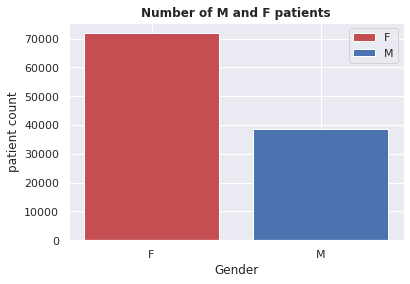

In [140]:
My_Barplots(label_1=Gender_df.index[0], height_1=Gender_df.values[0], label_2=Gender_df.index[1], height_2=Gender_df.values[1], 
         Title='Number of M and F patients', xLabel='Gender')

* We have 71840 females who scheduled for appointments.
* we have 38687 males who scheduled for appointments.
* Our dataset has most of the patients who made appointments were female.

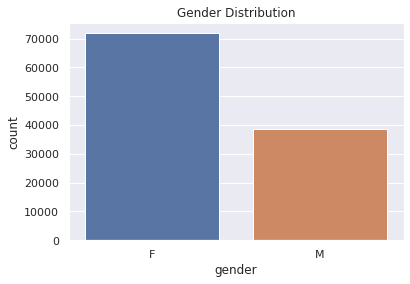

In [141]:
sns.countplot(x = 'gender', data = my_df)
plt.title("Gender Distribution")
plt.show()

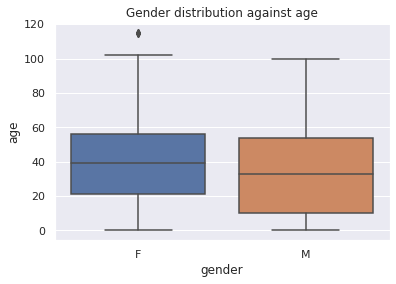

In [142]:
# plotting count plot of gender distribution vs age from our dataset.
sns.boxplot(x = 'gender', y = 'age', data = my_df)
plt.title("Gender distribution against age")
plt.show()

There is some outlier in the female gender.

In [143]:
my_df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

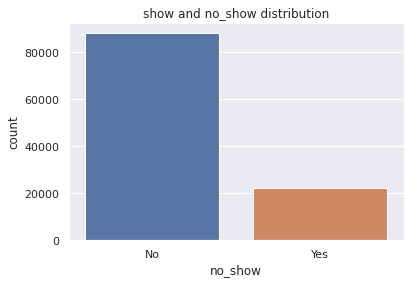

In [144]:
#plotting chart to visualize 
sns.countplot(x = 'no_show', data = my_df)
plt.title("show and no_show distribution")
plt.show()

* Almost 80 % of the patients who scheduled for appointments showed up while almost 20% did not show up for their appointment.
* After getting this what portion of this is male and female?

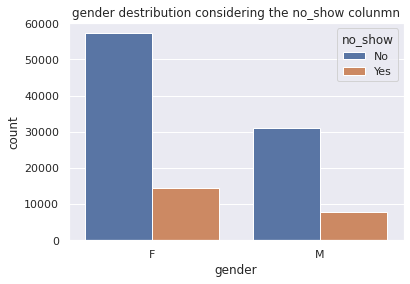

In [145]:
# visualizing the gender distribution considering the no_show column.
sns.countplot(x = 'gender', data = my_df, hue = 'no_show')
plt.title('gender destribution considering the no_show colunmn')
plt.show()

* About 58000 female patients showed up for their appointments compared to about 30000 male patients.
* About 15000 female patient did not show up for their scheduled appointments compared to about 8000 of male patients.
* It shoud be noted that we had a larger percentage of female patients scheduling apppointments compared to male patients which might be affecting the above outcome.

In [146]:
# using propotions.
proportions=category_propotions_function("gender", my_df)
proportions

gender  no_show
F       No         0.796851
        Yes        0.203149
M       No         0.800321
        Yes        0.199679
Name: no_show, dtype: float64

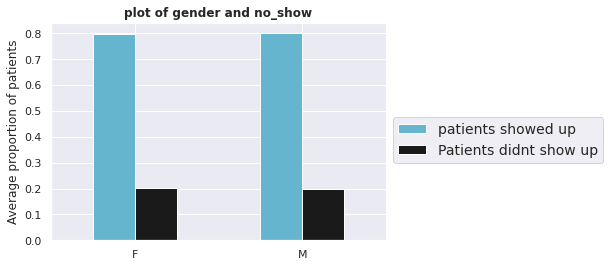

In [147]:
propotions_plotter(proportions, 'plot of gender', 'c', 'k', 'F', 'M')

* The propotion of male and female genders who showed up for their appoints are both around 80%
* Gender did not affect the no-show up.

### 2. Does having a particular disease have a relationship with showing up for the appointment?

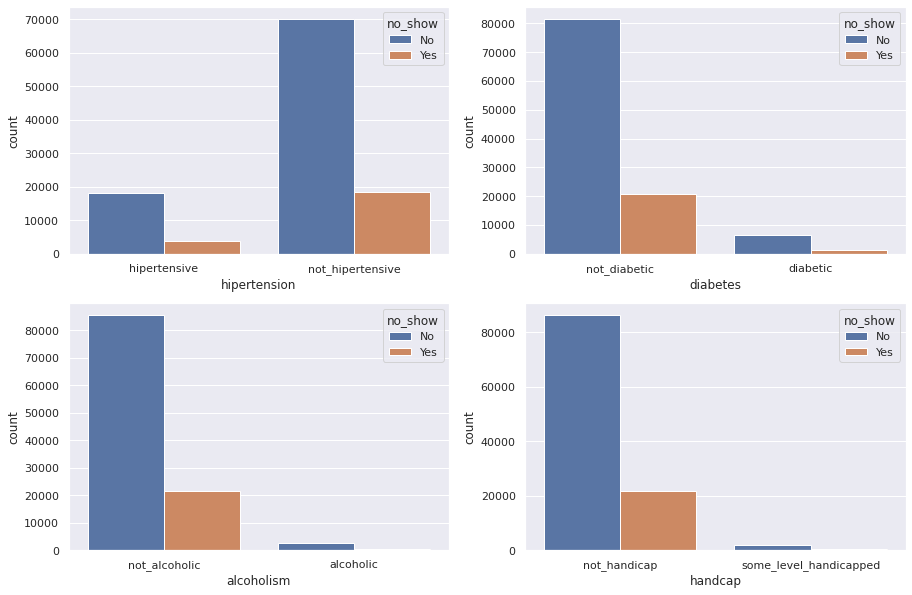

In [148]:
# plotting graphs of particular deseases vs no_show column.
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'hipertension', data = my_df, hue= 'no_show')
plt.subplot(2,2,2)
sns.countplot(x = 'diabetes', data = my_df, hue= 'no_show')
plt.subplot(2,2,3)
sns.countplot(x = 'alcoholism', data = my_df, hue= 'no_show')
plt.subplot(2,2,4)
sns.countplot(x = 'handcap', data = my_df, hue= 'no_show')
plt.show()


* Having some health condition did not affect showing up for a scheduled appoint.
* Further investigation using proportions needs to be done to get clear insights how different proportion catergories showed up or did not show up. 

In [149]:
proportions=category_propotions_function("hipertension", my_df)
proportions

hipertension      no_show
hipertensive      No         0.826980
                  Yes        0.173020
not_hipertensive  No         0.790961
                  Yes        0.209039
Name: no_show, dtype: float64

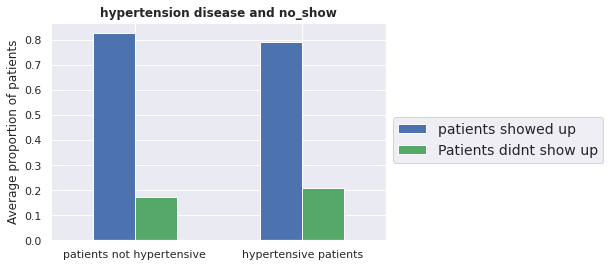

In [150]:
propotions_plotter(proportions, 'hypertension disease', 'b', 'g', 'patients not hypertensive', 'hypertensive patients')

* About 82% of Patients suffering from hypertension showed up for their appoints compared to 79% of patients without hypertension.

In [151]:
proportions=category_propotions_function("diabetes", my_df)
proportions

diabetes      no_show
diabetic      No         0.819967
              Yes        0.180033
not_diabetic  No         0.796370
              Yes        0.203630
Name: no_show, dtype: float64

* About 82% of diabetic patients showed up for their scheduled appointments compared to 79% of non-diabetic patients.

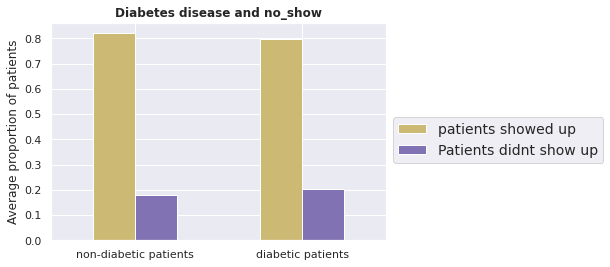

In [152]:
propotions_plotter(proportions, 'Diabetes disease', 'y', 'm', 'non-diabetic patients', 'diabetic patients')

 ### 3. Does one's age relate to not showing up for the appointment?

In [153]:
# We try to get the outliers of the ages >100.
my_df.query('age > 100').age.value_counts()

115    5
102    2
Name: age, dtype: int64

In [154]:

my_df.drop(my_df[my_df['age'] >100].index, inplace = True)


In [155]:
maximum_age = my_df.age.max()
maximum_age

100

In [156]:
#grouping the ages to age groups.
labels = ['0:10', '11:20', '21:30', '31:40', '41:50', '51:60', '61:70','71-80','80+']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, maximum_age]

age_grouping = pd.cut(my_df['age'], bins=bins, labels=labels)
my_df.insert(10, 'age_grouping', age_grouping)

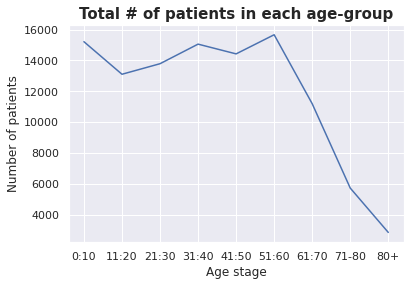

In [157]:
Patients_sum_inAgeset = my_df.groupby('age_grouping')['no_show'].count()

plt.plot(Patients_sum_inAgeset);
plt.title('Total # of patients in each age-group', fontsize=15, fontweight='bold');
plt.xlabel('Age stage', fontsize=12);
plt.ylabel('Number of patients', fontsize=12);


* Majority of patients are aged between 35 and 55 years.


### 4. How does one having schorlaship relate to a patient showing up for the appointment?

In [158]:
my_df.groupby('scholarship').no_show.value_counts(normalize=True)

scholarship  no_show
0            No         0.801943
             Yes        0.198057
1            No         0.762637
             Yes        0.237363
Name: no_show, dtype: float64

In [159]:
familia_data=my_df.scholarship.value_counts()

* Most people do not have scholarship.

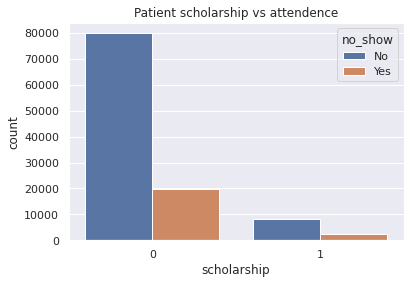

In [160]:
sns.countplot(x=my_df['scholarship'], hue=my_df['no_show']);
plt.title('Patient scholarship vs attendence');

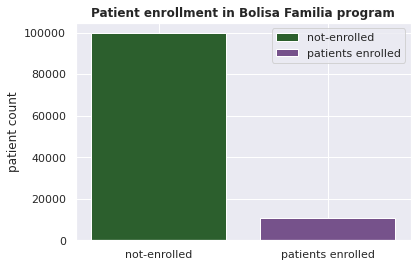

In [161]:
My_Barplots(label_1="not-enrolled", height_1=familia_data.values[0], label_2="patients enrolled", height_2=familia_data.values[1], 
         Title='Patient enrollment in Bolisa Familia program', col_1='#2C5F2D', col_2='#76528BFF')

* 90 % of patients are not enrolled to Bolsa Familia program.

In [162]:
proportions=category_propotions_function("scholarship", my_df)
proportions

scholarship  no_show
0            No         0.801943
             Yes        0.198057
1            No         0.762637
             Yes        0.237363
Name: no_show, dtype: float64

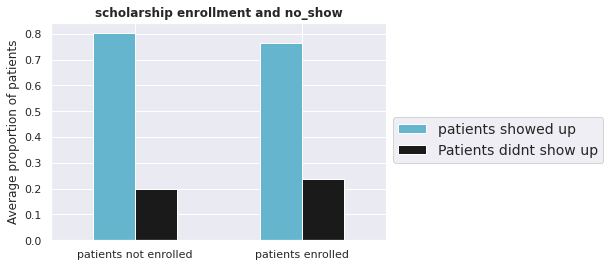

In [163]:
propotions_plotter(proportions, 'scholarship enrollment', 'c', 'k', 'patients not enrolled', 'patients enrolled')

* 80% of patients with no scholarship showed up for their appointments while 76% of those with scholarship did  show up.  

 ### 5. Does recieving sms relate to one showing up for the appointment?

In [164]:
sms_df = my_df['sms_received'].value_counts()
sms_df

0    75038
1    35481
Name: sms_received, dtype: int64

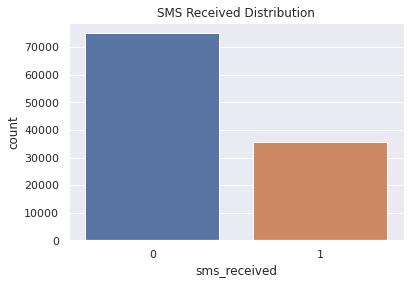

In [165]:
sns.countplot(x = 'sms_received', data = my_df)
plt.title("SMS Received Distribution")
plt.show()

* Over 75000 ptients did not recive sms.
* Over 35000 patients received sms.

In [166]:
proportions=category_propotions_function("sms_received", my_df)
proportions

sms_received  no_show
0             No         0.832991
              Yes        0.167009
1             No         0.724247
              Yes        0.275753
Name: no_show, dtype: float64

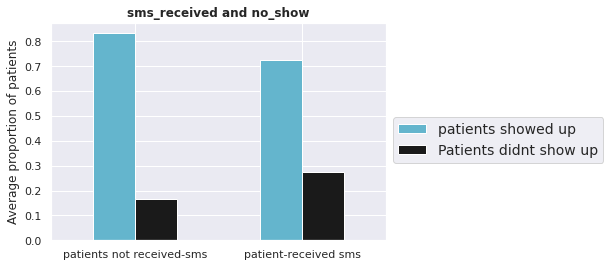

In [167]:
propotions_plotter(proportions, 'sms_received', 'c', 'k', 'patients not received-sms', 'patient-received sms')

* 80% of patient who did not receive sms showed up compared to 71% of those who did receive messages.

 ## **Conclusions**
* 1.The proportion of male and female patients that did not show up are pretty much the same.
    Therefore, **gender** is not one of the factors which determine if the patient will show up or not. Gender did not have an     effect on showing up or not.

* 2.Patient who are **diabetic and hypertensive are more likely to show up** compared to those who are not.This can be         conributed   by the fact that most patient with chronic condition are likely to be more alarmed of their current health conditions.  

* 3.Most of the patients did not receive an SMS.However,**if the patient received an SMS, they were more likely to show up**      to the appointment.

* 4.80% of patients with no scholarship showed up for their appointments while 76% of those with scholarship did  show up.  
* 5.Majority of patients are aged between 35 and 55 years.


 ## **Limitations**
 1. Females patient in our dataset were almsost twice the males patients.